In [1]:
from train import train
from QRDatasets import QRDatasets
from baseline_model import baseline_net
from utils import get_train_transform, get_test_transform, get_valid_transform, plotting
import pandas as pd
import numpy as np
import torch
import cv2

In [2]:
path_to_dataset = "/home/zhz396/QR-Code-DL/Datasets"
path_to_images = path_to_dataset+"/Image"
all_data = pd.read_csv(path_to_dataset+"/qr_label.csv")
all_data

,Unnamed: 0,id,Location,Camera,File Name,Image,Image Width,Image Height,x,y,w,h
0,0,0,LL_115-116,NikonD780,DSC_3125.JPG,DSC_3125,4024,6048,3882,230,350,355
1,1,1,LL_115-116,NikonD780,DSC_3460.JPG,DSC_3460,6048,4024,1282,3163,528,565
2,2,2,LL_115-116,NikonD780,DSC_3452.JPG,DSC_3452,4024,6048,1911,3116,549,545
3,3,3,LL_115-116,NikonD780,DSC_3200.JPG,DSC_3200,4024,6048,57,3330,440,478
4,4,4,LL_115-116,NikonD780,DSC_3207.JPG,DSC_3207,4024,6048,934,869,393,412
...,...,...,...,...,...,...,...,...,...,...,...,...
405,450,450,LL_119-120,NikonD7000_18mm,DSC_1035.JPG,DSC_1035,3264,4928,973,1725,799,749
406,451,451,LL_119-120,NikonD7000_18mm,DSC_1089.JPG,DSC_1089,3264,4928,1850,6,1305,1154
407,452,452,LL_119-120,NikonD7000_18mm,DSC_1100.JPG,DSC_1100,3264,4928,1027,1014,865,919
408,453,453,LL_119-120,NikonD7000_18mm,DSC_1080.JPG,DSC_1080,3264,4928,1714,1574,776,787


In [3]:
train_df = all_data[:400]
test_df = all_data[400:]
test_df.index = pd.RangeIndex(len(test_df.index))
print(train_df.shape)
print(test_df.shape)

(400, 12)
(10, 12)


In [4]:
train_tf = get_train_transform()
test_tf = get_test_transform()
train_dataset = QRDatasets(path_to_images, train_df, transforms=train_tf)
test_dataset = QRDatasets(path_to_images, test_df, transforms=test_tf)
# train_dataset = QRDatasets(path_to_images, train_df, transforms=None)
# test_dataset = QRDatasets(path_to_images, test_df, transforms=None)

In [5]:
# import matplotlib.pyplot as plt
# from PIL import Image
# from wbf_ensemble import *
# from ensemble_boxes import *
# for i in range(train_dataset.__len__()):
#     print(i)
#     img, target, idx = train_dataset.__getitem__(i)
# #     img = np.array(img)
#     img *= 255
# #     img = img.astype(np.uint8)
#     # need to merge three rgb channels
# #     img = cv2.merge((img[0], img[1], img[2]))
#     image_precisions = []
#     boxes = target['boxes']
#     boxes, scores, labels = weighted_boxes_fusion(boxes, scores, labels, weights=None, iou_thr=iou_thr,
#                                                   skip_box_thr=skip_box_thr)
#     boxes = boxes.astype(np.int32).clip(min=0, max=1023)

#     preds = boxes  # outputs[i]['boxes'].data.cpu().numpy()
#     # scores = outputs[i]['scores'].data.cpu().numpy()
#     preds_sorted_idx = np.argsort(scores)[::-1]
#     preds_sorted = preds[preds_sorted_idx]
#     gt_boxes = targets[i]['boxes'].cpu().numpy().astype(np.int32)
#     image_precision = calculate_image_precision(preds_sorted,
#                                                 gt_boxes,
#                                                 thresholds=iou_thresholds,
#                                                 form='coco')

#     image_precisions.append(image_precision)


#     print(image_precisions)

    # getting bbox
#     box = np.array(target['boxes'])[0]
#     x1 = int(box[0])
#     y1 = int(box[1])
#     x2 = int(box[2])
#     y2 = int(box[3])
#     print((x1, y1, x2, y2))
#     cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0),10)
#     plt.imshow(img)
#     plt.show()

In [6]:
base_model = baseline_net(num_classes=2)
params = [p for p in base_model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

In [7]:
my_trainer = train(model=base_model, optimizer=optimizer, num_epochs=20, early_stop=5,
                   train_dataset=train_dataset,test_dataset=test_dataset)

In [8]:
import os
import torch
if os.path.exists("models/best_model.pth"):
    model = torch.load("models/best_model.pth")
    my_trainer.model = model
else:
    model, train_score_list, train_loss_list, val_score_list, val_loss_list = my_trainer.mini_batch_training()
#     plotting(train_score_list, train_loss_list, val_score_list, val_loss_list)

/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
/opt/conda/envs/ml-latest/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/ml-latest/lib/python3.8/site-pa

nan
Epoch #1 train loss: 0.11199195452500135 Validation IOU: 0.8376 Time taken : 0:01:28
Saving model
Saving model as IOU is increased from 0.83762515 to 0.83762515
Saving model as VALIDATION LOSS is decreased from 0.04485743585973978 to 0.04485743585973978


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.8369366
Epoch #2 train loss: 0.039148844848386946 Validation IOU: 0.8607 Time taken : 0:01:29
Saving model as IOU is increased from 0.83762515 to 0.86067265
Saving model as VALIDATION LOSS is decreased from 0.04485743585973978 to 0.031383703695610166


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.92889833
Epoch #3 train loss: 0.02594127837801352 Validation IOU: 0.9431 Time taken : 0:01:26
Saving model as IOU is increased from 0.86067265 to 0.94314927
Saving model as VALIDATION LOSS is decreased from 0.031383703695610166 to 0.03166033197194338


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.93473226
Epoch #4 train loss: 0.024209222628269345 Validation IOU: 0.8867 Time taken : 0:01:30


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.9594307
Epoch #5 train loss: 0.019275240413844586 Validation IOU: 0.9519 Time taken : 0:01:30
Saving model as IOU is increased from 0.94314927 to 0.95192415
Saving model as VALIDATION LOSS is decreased from 0.03166033197194338 to 0.030020863004028796


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.97537297
Epoch #6 train loss: 0.016573381738271564 Validation IOU: 0.9389 Time taken : 0:01:28


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.9792423
Epoch #7 train loss: 0.015612662496278063 Validation IOU: 0.9601 Time taken : 0:01:26
Saving model as IOU is increased from 0.95192415 to 0.9600517
Saving model as VALIDATION LOSS is decreased from 0.030020863004028796 to 0.03180702701210976


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.9854447
Epoch #8 train loss: 0.014305325131863356 Validation IOU: 0.9402 Time taken : 0:01:30


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.965497
Epoch #9 train loss: 0.01269022804335691 Validation IOU: 0.9670 Time taken : 0:01:26
Saving model as IOU is increased from 0.9600517 to 0.9669852
Saving model as VALIDATION LOSS is decreased from 0.03180702701210976 to 0.029054170474410057


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.98832524
Epoch #10 train loss: 0.011651414493098856 Validation IOU: 0.9661 Time taken : 0:01:30


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.98944724
Epoch #12 train loss: 0.009932332253083587 Validation IOU: 0.9751 Time taken : 0:01:28
Saving model as IOU is increased from 0.9669852 to 0.97505796
Saving model as VALIDATION LOSS is decreased from 0.029054170474410057 to 0.029424059577286242


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.9864572
Epoch #13 train loss: 0.009106279374100268 Validation IOU: 0.9770 Time taken : 0:01:30
Saving model as IOU is increased from 0.97505796 to 0.9770325
Saving model as VALIDATION LOSS is decreased from 0.029424059577286242 to 0.030234223417937755


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.9872238
Epoch #14 train loss: 0.009073856385657563 Validation IOU: 0.9933 Time taken : 0:01:24
Saving model as IOU is increased from 0.9770325 to 0.9933034
Saving model as VALIDATION LOSS is decreased from 0.030234223417937755 to 0.028537012077867983


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.99139977
Epoch #15 train loss: 0.009315260779112577 Validation IOU: 0.9933 Time taken : 0:01:28


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.99142045
Epoch #16 train loss: 0.008868026279378683 Validation IOU: 0.9829 Time taken : 0:01:25


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.99129236
Epoch #17 train loss: 0.008505488181253896 Validation IOU: 0.9929 Time taken : 0:01:27


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.98599976
Epoch #18 train loss: 0.008776004624087364 Validation IOU: 0.9931 Time taken : 0:01:27


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0.98801786
Epoch #19 train loss: 0.007666935294400901 Validation IOU: 0.9904 Time taken : 0:01:27
Early stopping. Best Validation IOU: 0.993


In [9]:
outputs, test_images = my_trainer.predict()
print(outputs)

10


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


[{'boxes': array([[  4, 279, 156, 489]], dtype=int32), 'scores': array([0.99999964])}, {'boxes': array([[193,  78, 318, 256]], dtype=int32), 'scores': array([0.99999976])}, {'boxes': array([[ 73, 178, 139, 282]], dtype=int32), 'scores': array([0.99999988])}, {'boxes': array([[172, 247, 263, 377]], dtype=int32), 'scores': array([0.99999857])}, {'boxes': array([[195,   0, 331, 175]], dtype=int32), 'scores': array([0.99999964])}, {'boxes': array([[223,   0, 390, 214]], dtype=int32), 'scores': array([0.99999988])}, {'boxes': array([[104, 160, 198, 299]], dtype=int32), 'scores': array([0.99999917])}, {'boxes': array([[104,  64, 200, 211]], dtype=int32), 'scores': array([0.99999917])}, {'boxes': array([[102, 270, 184, 387]], dtype=int32), 'scores': array([0.99999964])}, {'boxes': array([[ 94,  47, 178, 171]], dtype=int32), 'scores': array([0.99999976])}]


In [10]:
from torch.utils.data import DataLoader
from utils import collate_fn
data_loader = DataLoader(test_dataset, shuffle=True, batch_size=4,
                                 pin_memory=True, collate_fn=collate_fn, num_workers=4)

[{'boxes': tensor([[105.1251,  64.2339, 201.6997, 206.1057]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9950], device='cuda:0', grad_fn=<IndexBackward>)}]


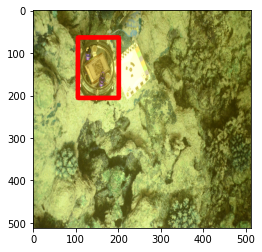

[{'boxes': tensor([[104.1985, 271.2725, 184.8583, 386.7287]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9952], device='cuda:0', grad_fn=<IndexBackward>)}]


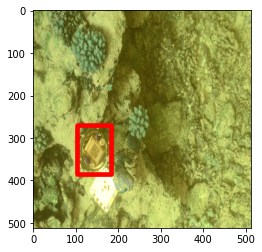

[{'boxes': tensor([[195.9048,   0.0000, 326.4646, 170.7880]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9964], device='cuda:0', grad_fn=<IndexBackward>)}]


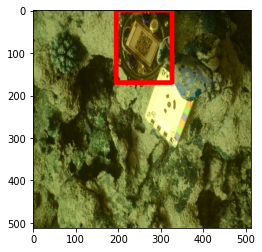

[{'boxes': tensor([[ 75.7882, 181.4103, 140.5599, 277.9522]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9943], device='cuda:0', grad_fn=<IndexBackward>)}]


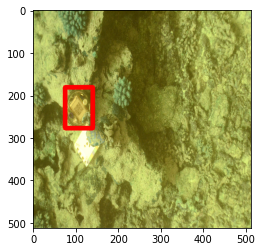

[{'boxes': tensor([[195.5650,  79.2086, 314.4872, 254.3920]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9971], device='cuda:0', grad_fn=<IndexBackward>)}]


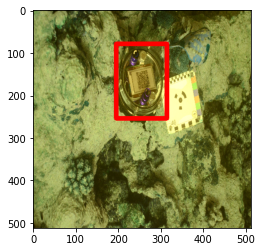

[{'boxes': tensor([[172.1881, 244.8977, 265.1850, 379.7980]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9919], device='cuda:0', grad_fn=<IndexBackward>)}]


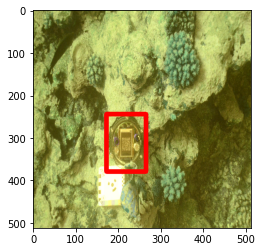

[{'boxes': tensor([[224.8866,   0.0000, 382.7104, 207.7011]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9977], device='cuda:0', grad_fn=<IndexBackward>)}]


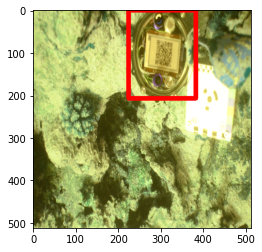

[{'boxes': tensor([[ 96.2751,  50.3864, 178.1522, 170.3732]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9966], device='cuda:0', grad_fn=<IndexBackward>)}]


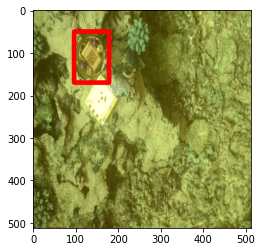

[{'boxes': tensor([[  5.1828, 280.2368, 152.0610, 489.0145],
        [138.5570, 370.4704, 151.1841, 391.4352],
        [ 34.9121, 285.5334,  53.2912, 308.7758]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1, 1, 1], device='cuda:0'), 'scores': tensor([0.9974, 0.1248, 0.1074], device='cuda:0', grad_fn=<IndexBackward>)}]


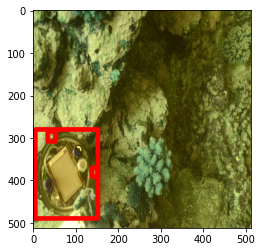

[{'boxes': tensor([[110.4871, 160.1977, 199.7625, 296.4009]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9942], device='cuda:0', grad_fn=<IndexBackward>)}]


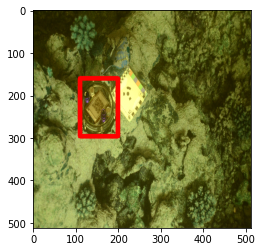

In [24]:
import matplotlib.pyplot as plt
for images, targets, image_ids in data_loader:
    for img in images:
        model.eval()
#         print(img.dim())
        output = model([img.cuda()])
        img = np.array(img)
        img *= 255
        img = img.astype(np.uint8)
        # need to merge three rgb channels
        img = cv2.merge((img[0], img[1], img[2]))
        
        print(output)
        boxes = output[0]['boxes']
        for box in boxes:
            x1 = int(box[0])
            y1 = int(box[1])
            x2 = int(box[2])
            y2 = int(box[3])
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0),10)
        plt.imshow(img)
        plt.show()
#         print(output)
        